# Project 2 for Introduction Of Data Science Subject (2023.1)

## Name: Gabriel Vicente Rodrigues
## NUSP: 11795377
## Email: gabriel_vr@usp.br

The objective of this project is to practice the concepts of data science, train models with different hyper parameters and compare them over a dataset of bank transactions labeled as fraudulent or not.

The project is divide into 4 questions, each one inteded to practice for a specific topic of the subject.

## Initial Configurations

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.mode.use_inf_as_na = True


In [3]:
# Reading datasets
trainDataset = pd.read_csv('train.csv')
testDataset = pd.read_csv('test.csv')

In [4]:
# Verifying if datasets have empty values
testDataset.isnull().values.any(), trainDataset.isnull().values.any()

(False, False)

## Question 1

### a) Identify the response variable of the problem and plot it with a histogram

In [5]:
trainDataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
#printing classes of the dataset
print(trainDataset['Class'].unique())

[0 1]


<Axes: xlabel='Class', ylabel='Count'>

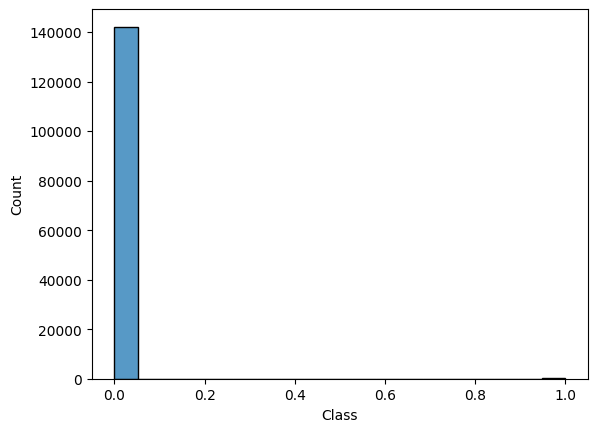

In [9]:
sns.histplot(trainDataset['Class'])

<Axes: xlabel='Class', ylabel='Count'>

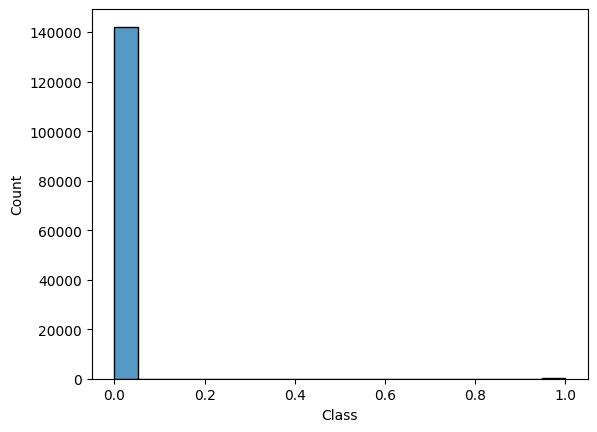

In [10]:
sns.histplot(testDataset['Class'])


In [15]:
# Separating the datasets into feature values and label values
y_train = trainDataset['Class']
X_train = trainDataset.drop(columns=['Class', 'Time'])
y_test = testDataset['Class']
X_test = testDataset.drop(columns=['Class', 'Time'])

In [19]:
nFrauds = trainDataset['Class'].sum()
nNotFrauds = trainDataset['Class'].count() - nFrauds
print("Number of non fraudulent transactions (training dataset): ", nNotFrauds)
print("Number of fraudulent transactions (training dataset):", nFrauds)

Number of non fraudulent transactions (training dataset):  142135
Number of fraudulent transactions (training dataset): 269


The response variable is Class, holding values of 0 or 1 which indicates if a transaction is fraudulent or not

### b) The database has one column containing metadata. Identify it and justify the answer 

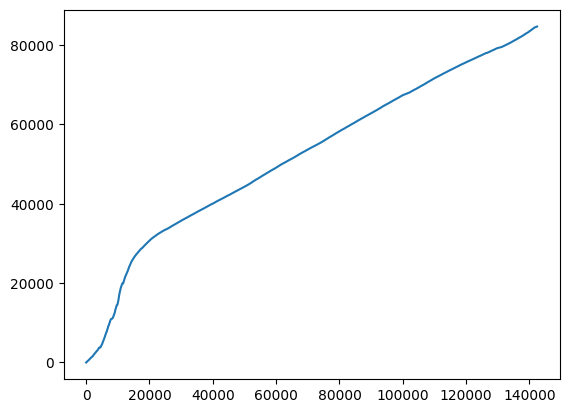

In [13]:
plt.plot(range(trainDataset.shape[0]), trainDataset['Time'])
plt.show()

The column containing metadata is the Time column, because the values are increasing no matter if the transaction is fraudulent or not or what is the data of the other columns.

## Question 2

### a) Compare the metrics Accuracy and AUC using and simulating a random model, a model that label every test entry as fraudulent and another that label as not fraudulent.

In [16]:
def accuracy(y_pred: pd.Series, y_test: pd.Series):
    return np.mean(y_pred == y_test)

def labelAsTrue(y_test: pd.Series):
    y_pred = np.ones((y_test.size), dtype=np.uint8)
    return pd.Series(y_pred)

def labelAsFalse(y_test: pd.Series):
    y_pred = np.zeros((y_test.size), dtype=np.uint8)
    return pd.Series(y_pred)

def labelRandomly(y_test: pd.Series):
    y_pred = np.random.choice([0, 1], (y_test.size))
    return pd.Series(y_pred)

* ####  Random
The random model gives an average accuracy and AUC of 50%. This is so because the random model hits and misses for both classes.

In [17]:
np.mean(labelRandomly(y_test) == y_test), roc_auc_score(y_test, labelRandomly(y_test))

(0.5024683468747148, 0.5214059485008267)

* #### All Fraud
The model gives an accuracy of 0.1% because the result is the proportion between the fraudulent transactions and all the dataset. Meanwhile, the AUC is of 50%, which is way better than the accuracy because it takes the true positive ratio (100%) and true negative ratio (0%) into account to calculate the score.

In [22]:
print(nFrauds/(nFrauds+nNotFrauds))
print(roc_auc_score(y_test, labelAsTrue(y_test)))

0.0018889918822504986
0.5


* #### All non fraud
The accuracy of this model is almost perfect of about 99%, but this value just represents the proportion of the non fraudulent transactions with the dataset and that is why it is not a good metric to analize the model. The AUC scores the model with 50%, the same as the previous model, but now with the proportions inverted, with the true negative ratio as 0% and the true positive ratio as 100%.


In [23]:
print(nNotFrauds/(nFrauds+nNotFrauds))
print(roc_auc_score(y_test, labelAsFalse(y_test)))

0.9981110081177496
0.5


### b) Which of the two metrics must be used to test the results of models according to this dataset: AUC or Accuracy?

The best metric to test the efficiency of the model is the AUC, because the classes have very different proportions.

## Question 3

### a) Using the RandomForestClassifier, do a 3 fold cross-validation to compare the combinations of the following hyper parameters
- n_estimators = [10, 50, 100, 200];
- max_depth = [2, 3, 4, 5].

In [32]:
parameters={
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 3, 4, 5]
}
rfc = RandomForestClassifier(random_state=42)
gs = GridSearchCV(
    rfc,
    param_grid=parameters,
    cv=3,
    scoring='roc_auc'
)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc')

In [36]:
print("The best parameters and score")
print(gs.best_params_), print(gs.best_score_)

The best parameters and score
{'max_depth': 5, 'n_estimators': 100}
0.9673589128101902


(None, None)

In [38]:
%%time
roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1])

CPU times: user 632 ms, sys: 0 ns, total: 632 ms
Wall time: 640 ms


0.9772246795100256

The best hyper parameters are max depth of 5 and 100 estimators, which gives a AUC score of about 97%

### b) Use the hyper parameter class_weight='balanced' and explain what it does and analyze the results

In [39]:
parameters={
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 3, 4, 5]
}
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
gsBalanced = GridSearchCV(
    rfc,
    param_grid=parameters,
    cv=3,
    scoring='roc_auc'
)
gsBalanced.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc')

In [40]:
print("The best parameters and score")
print(gsBalanced.best_params_), print(gsBalanced.best_score_)

The best parameters and score
{'max_depth': 5, 'n_estimators': 50}
0.9810531580905045


(None, None)

In [41]:
%%time
roc_auc_score(y_test, gsBalanced.predict_proba(X_test)[:, 1])

CPU times: user 402 ms, sys: 0 ns, total: 402 ms
Wall time: 401 ms


0.9752754198398166

The hyper parameter class_weight tells the model how the loss function will behave. If the classes have the same weight, the loss function will penalize equaly the misses for both classes, but when the hyper parameter is set to balanced, the classes with less frequency have more weight, meaning that the penalty for a miss is higher and the model will adjust better to this class.

The balanced model performs better with less estimators than the previous model, indicating that this hyper parameter also helps decreasing the complexity of the architecture.

## Question 4

### Usign the best model from the previous question, calculate the profit that such model would bring in the following scenario:
* The to 1% transactions with higher chance of fraud would be stopped from happening
* Each fraud avoided would bring a profit of $100
* Each non fraud blocked would bring loss of $2

In [42]:
y_pred = gsBalanced.predict_proba(X_test)

In [43]:
y_pred = y_pred[:, 1]

In [44]:
# Put the predicted probabilities and the real classes together to sort 
arrayPredictionsAndTrueClass = np.zeros((y_pred.size, 2), dtype=np.float64)
arrayPredictionsAndTrueClass[:, 0] = y_pred.reshape((-1,))
arrayPredictionsAndTrueClass[:, 1] = y_test
arrayPredictionsAndTrueClass

array([[0.04019276, 0.        ],
       [0.97851163, 1.        ],
       [0.03222649, 0.        ],
       ...,
       [0.04113151, 0.        ],
       [0.09653081, 0.        ],
       [0.06455111, 0.        ]])

In [45]:
# sort the values based on the first column
arrayPredictionsAndTrueClass = arrayPredictionsAndTrueClass[arrayPredictionsAndTrueClass[:, 0].argsort()[::-1]]

In [46]:
top1percent = int(arrayPredictionsAndTrueClass.shape[0]/100)
top1percent

1424

In [47]:
# set top 1% as fraud and the rest as non fraud
arrayPredictionsAndTrueClass[:top1percent, 0] = 1
arrayPredictionsAndTrueClass[top1percent:, 0] = 0
arrayPredictionsAndTrueClass = arrayPredictionsAndTrueClass.astype(np.uint8)

In [48]:
#pick the real class of the data predicted as fraud
labeledAsFraud= arrayPredictionsAndTrueClass[arrayPredictionsAndTrueClass[:, 0] == 1][:, 1]


In [49]:
profit = labeledAsFraud.sum() * 100
profit

19000.0

In [50]:
loss = (labeledAsFraud.shape[0] - labeledAsFraud.sum()) * 2
loss

2468.0

In [51]:
profit -= loss
profit

16532.0

<Axes: ylabel='Count'>

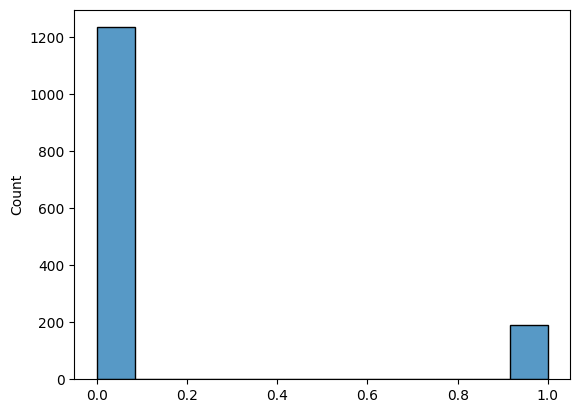

In [52]:
sns.histplot(labeledAsFraud)

The graph indicates the number of transactions labeled as fraud that were in fact fraud or that were non fraud. Almost over 1200 transactions were labeled as fraud but were not, while almost 200 transactions were labeled correctly. 

This approach would bring a profit of $16532.

## Conclusion

The analises made in this project are important to practice many steps of training a model.

First, we have to analise the distribution of our data according to its classes and choose the best method to score the models used. Then we have to test many hyper parameters to our model and choose the ones that perform better according to the method of scoring selected. 

In order to do it, we use a method called 3-fold cross validation, which separates our data into 3 folds and do 3 rounds of training, taking the mean as the score of the model with those hyper parameters. Then, we use the best model to predict the testing data to analize its performance.

After that, we can do deeper analises, like manually choosing the class of the testing data according to the probabilites generated by the model.